In [50]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [51]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [53]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [54]:
df.shape

(5110, 12)

In [55]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [56]:
duplicate = df[df.duplicated()]

duplicate

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [57]:
df ["bmi"] = df["bmi"].replace(np.NaN, df["bmi"].mean())

In [58]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

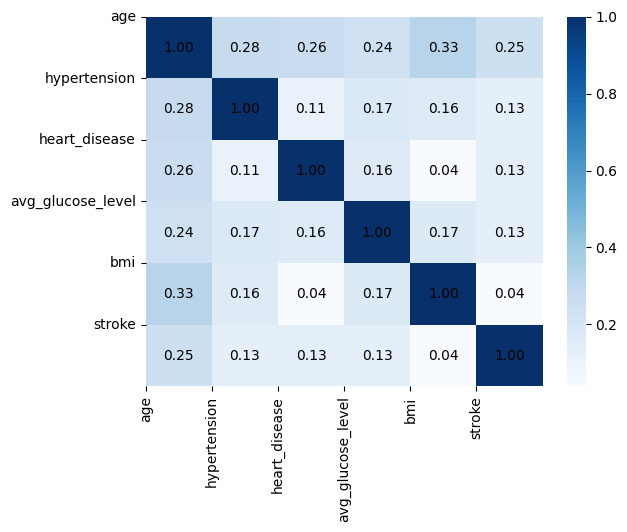

In [59]:
df_numerical = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
numeric_columns = df[df_numerical]
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, cmap='Blues')
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = '{:.2f}'.format(corr_matrix.iloc[i, j])
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=10)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

In [60]:
df.drop(['id', 'bmi'], axis=1, inplace=True)

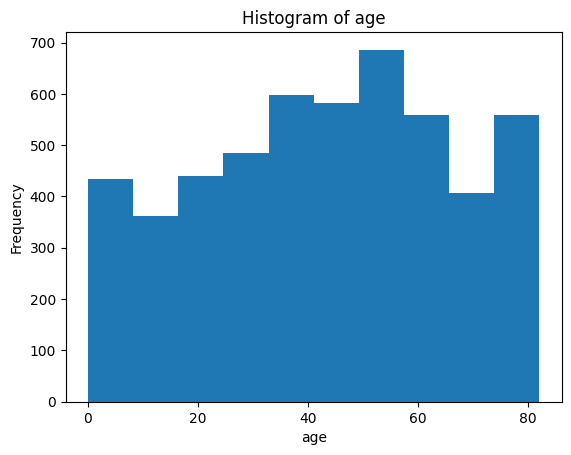

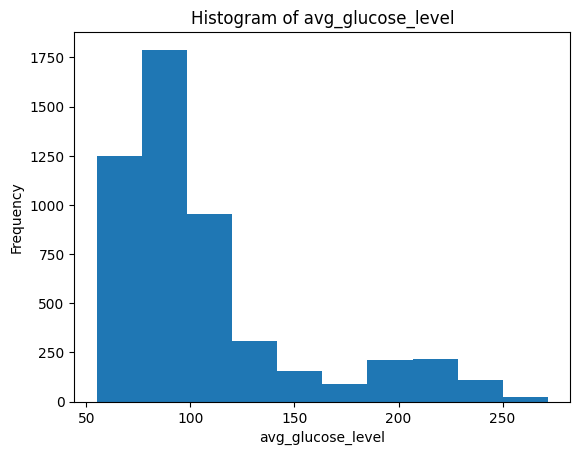

In [61]:
df_numerical2 = ['age','avg_glucose_level']
for column in df_numerical2:
    plt.hist(df[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

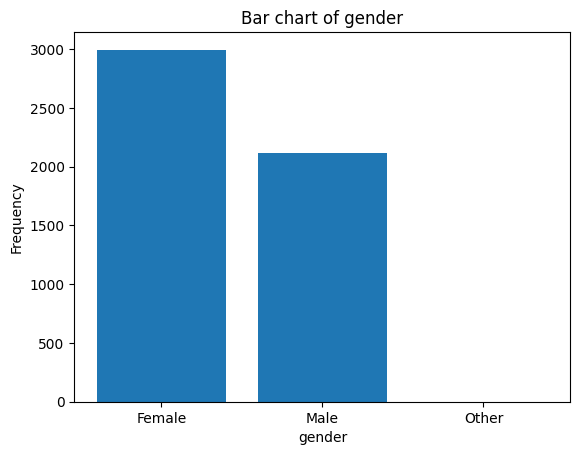

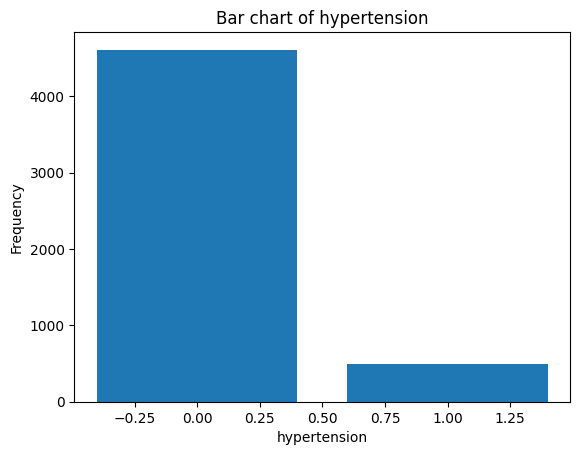

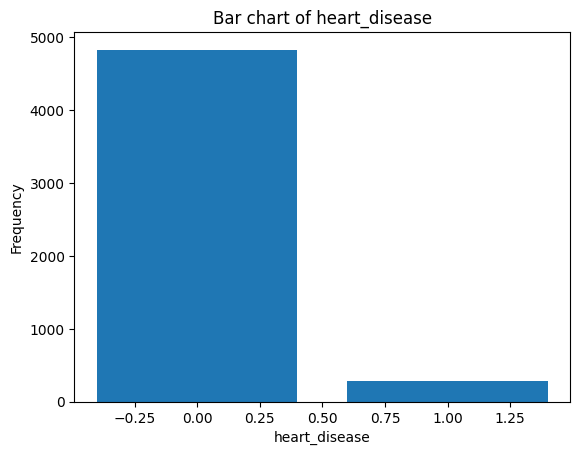

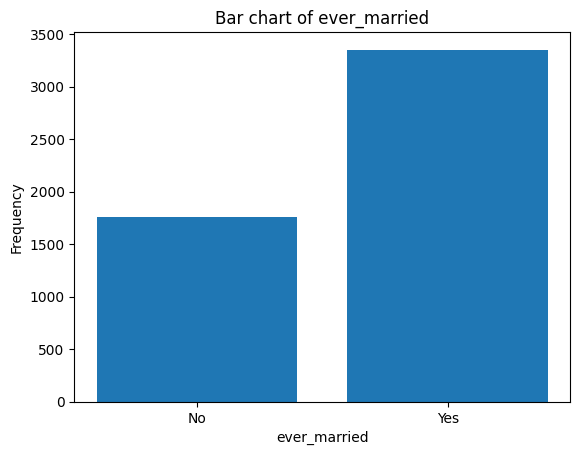

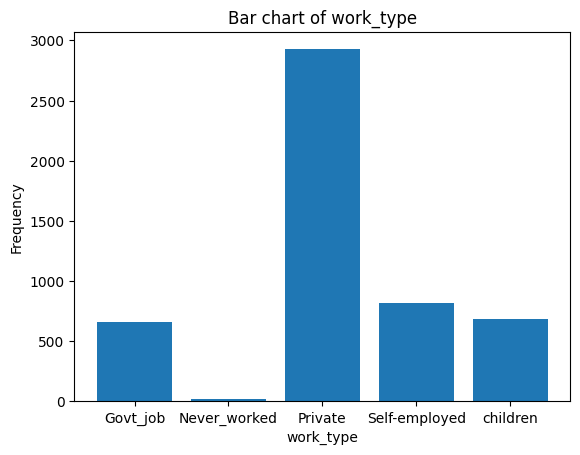

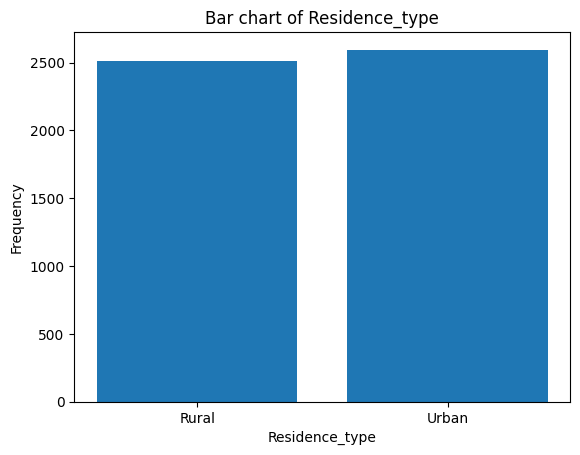

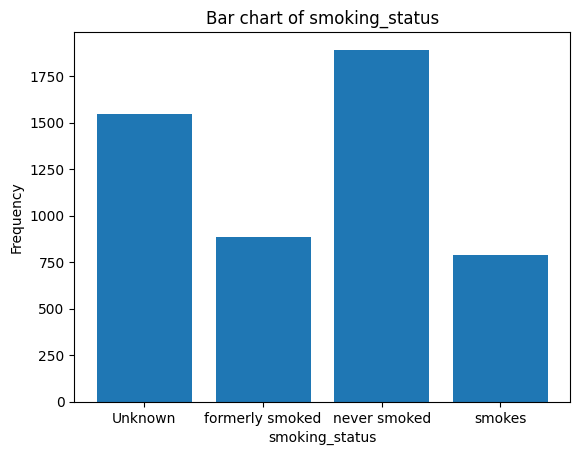

In [62]:
df_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in df_categorical:
    values, counts = np.unique(df[column], return_counts=True)
    plt.bar(values, counts)
    plt.title(f'Bar chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency') 
    plt.show() 

In [63]:
variable_names = []
chi2_p_values = []

for var in df_categorical:
    contingency_table = pd.crosstab(df[var], df['stroke'])
    
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    variable_names.append(var)
    chi2_p_values.append(p)

chi2_results = pd.DataFrame({'Categorical Variable': variable_names, 'Chi-Square p-value': chi2_p_values})

chi2_results = chi2_results.sort_values(by='Chi-Square p-value')

print(chi2_results)
df.shape

  Categorical Variable  Chi-Square p-value
2        heart_disease        2.088785e-21
1         hypertension        1.661622e-19
3         ever_married        1.638902e-14
4            work_type        5.397708e-10
6       smoking_status        2.085400e-06
5       Residence_type        2.983317e-01
0               gender        7.895491e-01


(5110, 10)

In [64]:
gender_mapping = {'Male': 0, 'Female': 1, np.nan : 2}
ever_married_mapping = {'No': 0, 'Yes': 1, np.nan : 2}
work_type_mapping = {'Never_worked': 0, 'Govt_job': 1, 'Self-employed': 2, 'children' : 3, 'Private' : 4, np.nan : 5}
Residence_type_mapping = {'Rural': 0, 'Urban': 1, np.nan : 2}
smoking_status_mapping = {'smokes': 0, 'formerly smoked': 1, 'unknown': 2, 'never smoked' : 3, np.nan : 4}

df['gender'] = df['gender'].map(gender_mapping)
df['ever_married'] = df['ever_married'].map(ever_married_mapping)
df['work_type'] = df['work_type'].map(work_type_mapping)
df['Residence_type'] = df['Residence_type'].map(Residence_type_mapping)
df['smoking_status'] = df['smoking_status'].map(smoking_status_mapping)

In [65]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,0.0,67.0,0,1,1,4,1,228.69,1.0,1
1,1.0,61.0,0,0,1,2,0,202.21,3.0,1
2,0.0,80.0,0,1,1,4,0,105.92,3.0,1
3,1.0,49.0,0,0,1,4,1,171.23,0.0,1
4,1.0,79.0,1,0,1,2,0,174.12,3.0,1


In [66]:
marks_list = df['gender'].tolist()

marks_list

[0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0

In [67]:
features = ["age",'hypertension', 'heart_disease', 'ever_married', 'work_type']
X = df[features]
Y = df['stroke']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [68]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train.values, Y_train.values)

RandomForestClassifier(random_state=42)

In [69]:
Y_pred = rf_classifier.predict(X_test.values)

accuracy = accuracy_score(Y_test, Y_pred)
confusion = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9549902152641878
Confusion Matrix:
 [[974   9]
 [ 37   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       983
           1       0.18      0.05      0.08        39

    accuracy                           0.95      1022
   macro avg       0.57      0.52      0.53      1022
weighted avg       0.93      0.95      0.94      1022



In [70]:
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump(rf_classifier, pickle_out)
pickle_out.close()